## Data Loading

In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt

In [2]:
import os
os.chdir('C:\\Users\\megan.lieu')

In [3]:
herndon_data = pd.read_csv('zillow_herndon (1).csv')
reston_data = pd.read_csv('zillow-reston (1).csv')
ashburn_data = pd.read_csv('zillow-ashburn (1).csv')
sterling_data = pd.read_csv('zillow-sterling.csv')
fallschurch_data = pd.read_csv('zillow_fallschurch.csv')
vienna_data = pd.read_csv('zillow_vienna.csv')
fairfax_data = pd.read_csv('zillow_fairfax.csv')
manassas_data = pd.read_csv('zillow_manassas.csv')
chantilly_data = pd.read_csv('zillow_chantilly.csv')
centreville_data = pd.read_csv('zillow_centreville.csv')
arlington_data = pd.read_csv('zillow_arlington.csv')
alexandria_data = pd.read_csv('zillow_alexandria.csv')
annandale_data = pd.read_csv('zillow_annandale.csv')
mclean_data = pd.read_csv('zillow_mclean.csv')
greatfalls_data = pd.read_csv('zillow_greatfalls.csv')
springfield_data = pd.read_csv('zillow_springfield.csv')

In [4]:
merged_housing_data = pd.concat([ashburn_data, herndon_data, reston_data, sterling_data, fallschurch_data, vienna_data, fairfax_data, manassas_data, chantilly_data, centreville_data, arlington_data, alexandria_data, annandale_data, mclean_data, greatfalls_data, springfield_data])

In [5]:
merged_housing_data

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,from,3,2,"2,500",NaN,"Buildable plan: Hudson, Downtown Brambleton, A...","$3,489/mo",Townhouse,Built in 2021,$286 price/sqft,NaN,NaN
1,1640747422-67,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/20695-Glenm...,"$811,650",3,4,"2,385","$810,900","20695 Glenmont Ter, Ashburn, VA 20147","$3,923/mo",Townhouse,Built in 2021,$340 price/sqft,NaN,NaN
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,from,3,2,"2,726",NaN,"Buildable plan: Manhattan, Downtown Brambleton...","$3,612/mo",Townhouse,Built in 2021,$273 price/sqft,NaN,NaN
3,1640747398-65,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/20434-Cool-...,"$499,900",4,4,"1,910","$502,500","20434 Cool Fern Sq, Ashburn, VA 20147","$2,414/mo",Townhouse,Built in 1998,$262 price/sqft,NaN,NaN
4,1640747499-73,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/23090-Dunlo...,"$620,000",4,4,"1,854","$574,400","23090 Dunlop Heights Ter, Ashburn, VA 20148","$2,954/mo",Townhouse,Built in 2010,$334 price/sqft,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1641259459-196,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/8527-Kentfo...,"$785,000",5,3,"1,680","$798,100","8527 Kentford Dr, Springfield, VA 22152","$3,546/mo",Single family residence,Built in 1968,NaN,NaN,NaN
5,1641259508-199,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/8801-Law-Ct...,"$875,000",4,3,"2,791","$875,000","8801 Law Ct, Springfield, VA 22152","$3,953/mo",Single family residence,Built in 1967,NaN,NaN,NaN
6,1641259446-195,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/7508-Mendot...,"$520,000",4,2,"1,424","$621,300","7508 Mendota Pl, Springfield, VA 22150","$2,366/mo",Single family residence,Built in 1955,NaN,NaN,NaN
7,1641259370-191,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/6600-Huntsm...,"$674,900",4,3,"2,064",NaN,"6600 Huntsman Blvd, Springfield, VA 22152","$3,049/mo",Single family residence,Built in 1966,NaN,NaN,NaN


## Data Cleaning and Transforming

In [6]:
merged_housing_data['Est_pmt']=merged_housing_data['Est_pmt'].str.replace('/mo','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace('$','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace(',','')

merged_housing_data['Sqft']=merged_housing_data['Sqft'].str.replace(',','')
merged_housing_data["Sqft"] = merged_housing_data["Sqft"].apply(pd.to_numeric)

#make sure Zestimates are not null before running this
merged_housing_data['Zestimate'] = merged_housing_data['Zestimate'].str.replace('$','')
merged_housing_data['Zestimate'] = merged_housing_data['Zestimate'].str.replace(',','')
merged_housing_data['Zestimate'] = merged_housing_data['Zestimate'].apply(pd.to_numeric)

merged_housing_data['Price'] = merged_housing_data['Price'].str.replace('$','')
merged_housing_data['Price'] = merged_housing_data['Price'].str.replace(',','')
merged_housing_data['Price'] = merged_housing_data['Price'].replace('from', np.NaN)
merged_housing_data['Price'] = merged_housing_data['Price'].apply(pd.to_numeric)

merged_housing_data['No_bd'] = merged_housing_data['No_bd'].apply(pd.to_numeric)
merged_housing_data['No_ba'] = merged_housing_data['No_ba'].apply(pd.to_numeric)

merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace('$','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace(',','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace('/mo','')
merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].apply(pd.to_numeric)

<ipython-input-6-b2d5d62cfe19>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_housing_data['Est_pmt'] = merged_housing_data['Est_pmt'].str.replace('$','')
<ipython-input-6-b2d5d62cfe19>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_housing_data['Zestimate'] = merged_housing_data['Zestimate'].str.replace('$','')
<ipython-input-6-b2d5d62cfe19>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_housing_data['Price'] = merged_housing_data['Price'].str.replace('$','')
<ipython-input-6-b2d5d62cfe19>:21: F

In [7]:
merged_housing_data[merged_housing_data['Price'].isna()]
# merged_housing_data['Address'][merged_housing_data['web-scraper-order']=='1641069999-143'].to_clipboard()

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,NaN,3,2,2500,NaN,"Buildable plan: Hudson, Downtown Brambleton, A...",3489,Townhouse,Built in 2021,$286 price/sqft,NaN,NaN
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,NaN,3,2,2726,NaN,"Buildable plan: Manhattan, Downtown Brambleton...",3612,Townhouse,Built in 2021,$273 price/sqft,NaN,NaN
5,1640747472-71,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/demott-silver...,NaN,3,3,2708,777900.0,"Buildable plan: Mayfair, Demott & Silver, Ashb...",3682,Townhouse,Built in 2021,$287 price/sqft,NaN,NaN
6,1640747431-68,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/regency-at-be...,NaN,3,3,2953,NaN,"Buildable plan: Dylan, Regency at Belmont, Ash...",3280,Townhouse,Built in 2021,NaN,NaN,NaN
2,1640747588-76,https://www.zillow.com/herndon-va/3-_beds/2.0-...,NaN,https://www.zillow.com/community/foster-s-glen...,NaN,4,4,2022,NaN,"Buildable plan: Strauss, Foster's Glen, Herndo...",3301,Townhouse,Built in 2021,NaN,NaN,NaN
8,1640747676-82,https://www.zillow.com/herndon-va/3-_beds/2.0-...,NaN,https://www.zillow.com/community/liberty-park/...,NaN,3,3,2332,NaN,"Buildable plan: The Ryder, Liberty Park, Hernd...",3167,Townhouse,Built in 2021,NaN,NaN,NaN
7,1641069999-143,"https://www.zillow.com/homes/Falls-Church,-VA_rb/",NaN,NaN,NaN,4,5,5500,NaN,Buildable plan: Blue Diamond - Future Construc...,4485,Singlefamily,Built in 2022,NaN,NaN,https://www.zillow.com/community/by-botero-hom...
0,1641068098-108,"https://www.zillow.com/homes/Fairfax,-VA_rb/",NaN,https://www.zillow.com/community/park-at-fair-...,NaN,3,3,2345,NaN,"Buildable plan: The Julianne, Park at Fair Oak...",2965,Townhouse,Built in 2022,$281 price/sqft,NaN,NaN
2,1641067997-101,"https://www.zillow.com/homes/Fairfax,-VA_rb/",NaN,https://www.zillow.com/community/towns-at-pend...,NaN,3,4,2818,NaN,"Buildable plan: McDaniel I, The Towns at Pende...",4200,Townhouse,Built in 2022,$332 price/sqft,NaN,NaN
1,1641071651-170,"https://www.zillow.com/homes/Arlington,-VA_rb/",NaN,https://www.zillow.com/homedetails/2244-23rd-S...,NaN,3,5,2300,918500.0,"2244 23rd St S, Arlington, VA 22202",4288,Townhouse,"Energy star qualified equipment, natural gas",$407 price/sqft,NaN,NaN


In [8]:
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747431-68', "Price"] = 717995
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747588-76', "Price"] = 739990
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747676-82', "Price"] = 709990
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071670-171', "Price"] = 1714900
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641069999-143', "Price"] = 998500
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641078704-173', "Price"] = 1687324
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071651-170', "Price"] = 715900
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747413-66', "Price"] = 742900
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747472-71', "Price"] = 777865
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641068098-108', "Price"] = 659990
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641067997-101', "Price"] = 934990
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071651-170', "Price"] = 936125
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071551-165', "Price"] = 946175
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071613-168', "Price"] = 895000
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1641071629-169', "Price"] = 944335
merged_housing_data.loc[merged_housing_data['web-scraper-order'] == '1640747444-69', "Price"] = 715900

In [9]:
merged_housing_data[merged_housing_data['Price'].isna()]

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href


In [10]:
# merged_housing_data = merged_housing_data.drop(columns='Price_sqft2')
replacement = {
    "$": "",
    " price/sqft": ""
}

merged_housing_data['Price_sqft'] = merged_housing_data['Price_sqft'].replace(replacement,regex=True)
merged_housing_data['Price_sqft'] = merged_housing_data['Price_sqft'].str.replace("$", "")

# merged_housing_data['Price_sqft2'] = np.where(merged_housing_data['Price'].notna(), (merged_housing_data['Price']/merged_housing_data['Sqft']), merged_housing_data['Price_sqft'].replace(replacement,regex=True))
 

<ipython-input-10-72fffd217cc0>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_housing_data['Price_sqft'] = merged_housing_data['Price_sqft'].str.replace("$", "")


In [11]:
merged_housing_data['Price_sqft2'] = np.where(merged_housing_data['Price'].notna(), (merged_housing_data['Price']/merged_housing_data['Sqft']), merged_housing_data['Price_sqft'])
merged_housing_data['Price_sqft2'] = np.where(merged_housing_data['Price_sqft']=='No data', (merged_housing_data['Price']/merged_housing_data['Sqft']), merged_housing_data['Price_sqft'])

merged_housing_data['Price_sqft2'] = np.where(merged_housing_data['Price_sqft2'].isna(), (merged_housing_data['Price']/merged_housing_data['Sqft']), merged_housing_data['Price_sqft2'])

In [12]:
merged_housing_data[merged_housing_data['Price_sqft2'].isna()]

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href,Price_sqft2


In [13]:
merged_housing_data['Price_sqft2'] = merged_housing_data['Price_sqft2'].apply(pd.to_numeric).round(1)
# merged_housing_data[merged_housing_data['Price_sqft2']=='1,742 sqft']

In [14]:
# merged_housing_data[~merged_housing_data['Year_built'].str.contains('Built in')]
merged_housing_data.loc[~merged_housing_data['Year_built'].str.contains('Built in'), 'Year_built'] = 'Built in 2022'

In [15]:
def split_year(date):
    x = re.search('\d{4}', date)
    if x:
        return(x.group())
    
merged_housing_data['Year'] = merged_housing_data['Year_built'].apply(split_year)

In [16]:
merged_housing_data['Year'] = merged_housing_data['Year'].apply(pd.to_numeric)

In [17]:
merged_housing_data['Year'] = merged_housing_data['Year'].fillna(0)
merged_housing_data['Year'] = merged_housing_data.Year.astype(int)

In [18]:
merged_housing_data['Year'] = np.where(merged_housing_data['Year']==0, np.NaN, merged_housing_data['Year'])

In [19]:
merged_housing_data['Age'] = 2022 - merged_housing_data['Year']

In [20]:
merged_housing_data

,web-scraper-order,web-scraper-start-url,listing_link,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,linking_list,linking_list-href,Price_sqft2,Year,Age
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,715900.0,3,2,2500,NaN,"Buildable plan: Hudson, Downtown Brambleton, A...",3489,Townhouse,Built in 2021,286,NaN,NaN,286.0,2021.0,1.0
1,1640747422-67,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/20695-Glenm...,811650.0,3,4,2385,810900.0,"20695 Glenmont Ter, Ashburn, VA 20147",3923,Townhouse,Built in 2021,340,NaN,NaN,340.0,2021.0,1.0
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/community/downtown-bram...,742900.0,3,2,2726,NaN,"Buildable plan: Manhattan, Downtown Brambleton...",3612,Townhouse,Built in 2021,273,NaN,NaN,273.0,2021.0,1.0
3,1640747398-65,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/20434-Cool-...,499900.0,4,4,1910,502500.0,"20434 Cool Fern Sq, Ashburn, VA 20147",2414,Townhouse,Built in 1998,262,NaN,NaN,262.0,1998.0,24.0
4,1640747499-73,"https://www.zillow.com/homes/Ashburn,-VA_rb/",NaN,https://www.zillow.com/homedetails/23090-Dunlo...,620000.0,4,4,1854,574400.0,"23090 Dunlop Heights Ter, Ashburn, VA 20148",2954,Townhouse,Built in 2010,334,NaN,NaN,334.0,2010.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1641259459-196,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/8527-Kentfo...,785000.0,5,3,1680,798100.0,"8527 Kentford Dr, Springfield, VA 22152",3546,Single family residence,Built in 1968,NaN,NaN,NaN,467.3,1968.0,54.0
5,1641259508-199,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/8801-Law-Ct...,875000.0,4,3,2791,875000.0,"8801 Law Ct, Springfield, VA 22152",3953,Single family residence,Built in 1967,NaN,NaN,NaN,313.5,1967.0,55.0
6,1641259446-195,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/7508-Mendot...,520000.0,4,2,1424,621300.0,"7508 Mendota Pl, Springfield, VA 22150",2366,Single family residence,Built in 1955,NaN,NaN,NaN,365.2,1955.0,67.0
7,1641259370-191,"https://www.zillow.com/homes/Springfield,-VA_rb/",NaN,https://www.zillow.com/homedetails/6600-Huntsm...,674900.0,4,3,2064,NaN,"6600 Huntsman Blvd, Springfield, VA 22152",3049,Single family residence,Built in 1966,NaN,NaN,NaN,327.0,1966.0,56.0


In [21]:
merged_housing_data = merged_housing_data.astype({'Est_pmt':'float'})
merged_housing_data = merged_housing_data.astype({'Sqft':'float'})
merged_housing_data = merged_housing_data.astype({'Address':'string'})
merged_housing_data = merged_housing_data.astype({'Townhouse':'string'})
merged_housing_data = merged_housing_data.astype({'Year_built':'string'})
merged_housing_data = merged_housing_data.astype({'Price_sqft':'string'})

In [22]:
merged_housing_data.dtypes

web-scraper-order         object
web-scraper-start-url     object
listing_link             float64
listing_link-href         object
Price                    float64
No_bd                      int64
No_ba                      int64
Sqft                     float64
Zestimate                float64
Address                   string
Est_pmt                  float64
Townhouse                 string
Year_built                string
Price_sqft                string
linking_list             float64
linking_list-href         object
Price_sqft2              float64
Year                     float64
Age                      float64
dtype: object

In [23]:
def split_city(address):
    City = re.search('(.*), VA', address)
    if City:
        return(City.group(1))

merged_housing_data['City'] = merged_housing_data['Address'].apply(split_city)
merged_housing_data = merged_housing_data.astype({'City':'string'})

In [24]:
# merged_housing_data['City2'] = merged_housing_data['City'].apply(split_city2)
merged_housing_data[['Build', 'Street', 'City2']] = merged_housing_data['City'].str.split(',',expand=True)

merged_housing_data.loc[merged_housing_data['City2'].isna(), 'City3'] = 'na'

In [25]:
merged_housing_data['City3'] = np.where(merged_housing_data['City2'].isna(), merged_housing_data['City3'], merged_housing_data['City2'])
merged_housing_data['City3'] = np.where(merged_housing_data['City2'].notna(), merged_housing_data['City3'], merged_housing_data['Street'])

merged_housing_data = merged_housing_data.astype({'City3':'string'})

In [26]:
merged_housing_data = merged_housing_data.drop(columns=['listing_link', 'City', 'Build', 'Street', 'City2', 'linking_list', 'linking_list-href', 'Price_sqft'])

In [27]:
merged_housing_data = merged_housing_data.rename(columns = {'Price_sqft2':'Price_sqft'})
merged_housing_data = merged_housing_data.rename(columns = {'City3':'City'})

In [28]:
merged_housing_data['City'] = merged_housing_data['City'].str.replace('Mc Lean', 'McLean')

In [29]:
merged_housing_data['Price'] = np.where(merged_housing_data['Price'].isna() & merged_housing_data['Price_sqft'].notna(), (merged_housing_data['Sqft']*merged_housing_data['Price_sqft']), merged_housing_data['Price'])
merged_housing_data['Zestimate'] = np.where(merged_housing_data['Zestimate'].isna() & merged_housing_data['Price'].notna(), merged_housing_data['Price'], merged_housing_data['Zestimate'])

In [30]:
merged_housing_data['Townhouse'] = merged_housing_data['Townhouse'].str.replace('Singlefamily', 'Single family residence')

In [31]:
merged_housing_data.head()

,web-scraper-order,web-scraper-start-url,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,Year,Age,City
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/community/downtown-bram...,715900.0,3,2,2500.0,715900.0,"Buildable plan: Hudson, Downtown Brambleton, A...",3489.0,Townhouse,Built in 2021,286.0,2021.0,1.0,Ashburn
1,1640747422-67,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/20695-Glenm...,811650.0,3,4,2385.0,810900.0,"20695 Glenmont Ter, Ashburn, VA 20147",3923.0,Townhouse,Built in 2021,340.0,2021.0,1.0,Ashburn
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/community/downtown-bram...,742900.0,3,2,2726.0,742900.0,"Buildable plan: Manhattan, Downtown Brambleton...",3612.0,Townhouse,Built in 2021,273.0,2021.0,1.0,Ashburn
3,1640747398-65,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/20434-Cool-...,499900.0,4,4,1910.0,502500.0,"20434 Cool Fern Sq, Ashburn, VA 20147",2414.0,Townhouse,Built in 1998,262.0,1998.0,24.0,Ashburn
4,1640747499-73,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/23090-Dunlo...,620000.0,4,4,1854.0,574400.0,"23090 Dunlop Heights Ter, Ashburn, VA 20148",2954.0,Townhouse,Built in 2010,334.0,2010.0,12.0,Ashburn


In [32]:
merged_housing_data.to_excel("merged_housing_data.xlsx")

## Creating Final Dataset

In [33]:
city_stats_dict = [
    {'City': 'Ashburn', 'City_population': 56377, 'City_med_income': 122687, 'City_med_age': 34.4},
    {'City': 'Herndon', 'City_population': 24573, 'City_med_income': 100399, 'City_med_age': 34.2},
    {'City': 'Alexandria', 'City_population': 158726, 'City_med_income': 87319, 'City_med_age': 35.8},
    {'City': 'Annandale', 'City_population': 44887, 'City_med_income': 78780, 'City_med_age': 37.6},
    {'City': 'Arlington', 'City_population': 240798, 'City_med_income': 105120, 'City_med_age': 33.8},
    {'City': 'Centreville', 'City_population': 75268, 'City_med_income': 103696, 'City_med_age': 34},
    {'City': 'Chantilly', 'City_population': 25015, 'City_med_income': 118991, 'City_med_age': 35.3},
    {'City': 'Fairfax', 'City_population': 23429, 'City_med_income': 100584, 'City_med_age': 39},
    {'City': 'Falls Church', 'City_population': 14631, 'City_med_income': 120500, 'City_med_age': 36.7},
    {'City': 'Great Falls', 'City_population': 15723, 'City_med_income': 229200, 'City_med_age': 45.4},
    {'City': 'Manassas', 'City_population': 40869, 'City_med_income': 71215, 'City_med_age': 32.6},
    {'City': 'Reston', 'City_population': 60871, 'City_med_income': 110321, 'City_med_age': 39},
    {'City': 'Sterling', 'City_population': 34324, 'City_med_income': 86968, 'City_med_age': 33},
    {'City': 'Vienna', 'City_population': 16518, 'City_med_income': 133776, 'City_med_age': 40.9},
    {'City': 'McLean', 'City_population': 47712, 'City_med_income': 188639, 'City_med_age': 46},
    {'City': 'Springfield', 'City_population': 30819, 'City_med_income': 89516, 'City_med_age': 37.8},
]

city_stats = pd.DataFrame(city_stats_dict)

In [34]:
# city_stats = city_stats.astype({'City':'string'})
city_stats.dtypes

City                object
City_population      int64
City_med_income      int64
City_med_age       float64
dtype: object

In [35]:
merged_housing_data['City'].dtypes == city_stats['City'].dtypes
merged_housing_data['City'] = merged_housing_data['City'].astype(str)
merged_housing_data['City'] = merged_housing_data['City'].str.strip()
final_housing_data = pd.merge(merged_housing_data, city_stats, on='City', how='left')
final_housing_data

,web-scraper-order,web-scraper-start-url,listing_link-href,Price,No_bd,No_ba,Sqft,Zestimate,Address,Est_pmt,Townhouse,Year_built,Price_sqft,Year,Age,City,City_population,City_med_income,City_med_age
0,1640747444-69,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/community/downtown-bram...,715900.0,3,2,2500.0,715900.0,"Buildable plan: Hudson, Downtown Brambleton, A...",3489.0,Townhouse,Built in 2021,286.0,2021.0,1.0,Ashburn,56377,122687,34.4
1,1640747422-67,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/20695-Glenm...,811650.0,3,4,2385.0,810900.0,"20695 Glenmont Ter, Ashburn, VA 20147",3923.0,Townhouse,Built in 2021,340.0,2021.0,1.0,Ashburn,56377,122687,34.4
2,1640747413-66,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/community/downtown-bram...,742900.0,3,2,2726.0,742900.0,"Buildable plan: Manhattan, Downtown Brambleton...",3612.0,Townhouse,Built in 2021,273.0,2021.0,1.0,Ashburn,56377,122687,34.4
3,1640747398-65,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/20434-Cool-...,499900.0,4,4,1910.0,502500.0,"20434 Cool Fern Sq, Ashburn, VA 20147",2414.0,Townhouse,Built in 1998,262.0,1998.0,24.0,Ashburn,56377,122687,34.4
4,1640747499-73,"https://www.zillow.com/homes/Ashburn,-VA_rb/",https://www.zillow.com/homedetails/23090-Dunlo...,620000.0,4,4,1854.0,574400.0,"23090 Dunlop Heights Ter, Ashburn, VA 20148",2954.0,Townhouse,Built in 2010,334.0,2010.0,12.0,Ashburn,56377,122687,34.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1641259459-196,"https://www.zillow.com/homes/Springfield,-VA_rb/",https://www.zillow.com/homedetails/8527-Kentfo...,785000.0,5,3,1680.0,798100.0,"8527 Kentford Dr, Springfield, VA 22152",3546.0,Single family residence,Built in 1968,467.3,1968.0,54.0,Springfield,30819,89516,37.8
139,1641259508-199,"https://www.zillow.com/homes/Springfield,-VA_rb/",https://www.zillow.com/homedetails/8801-Law-Ct...,875000.0,4,3,2791.0,875000.0,"8801 Law Ct, Springfield, VA 22152",3953.0,Single family residence,Built in 1967,313.5,1967.0,55.0,Springfield,30819,89516,37.8
140,1641259446-195,"https://www.zillow.com/homes/Springfield,-VA_rb/",https://www.zillow.com/homedetails/7508-Mendot...,520000.0,4,2,1424.0,621300.0,"7508 Mendota Pl, Springfield, VA 22150",2366.0,Single family residence,Built in 1955,365.2,1955.0,67.0,Springfield,30819,89516,37.8
141,1641259370-191,"https://www.zillow.com/homes/Springfield,-VA_rb/",https://www.zillow.com/homedetails/6600-Huntsm...,674900.0,4,3,2064.0,674900.0,"6600 Huntsman Blvd, Springfield, VA 22152",3049.0,Single family residence,Built in 1966,327.0,1966.0,56.0,Springfield,30819,89516,37.8


In [36]:
final_housing_data.to_csv("final_housing_data.csv")

## EDA Visualizations

In [37]:
# !pip install hvplot

import matplotlib.pyplot as plt
import seaborn as sns
# import hvplot.pandas
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.pipeline import Pipeline
%matplotlib inline

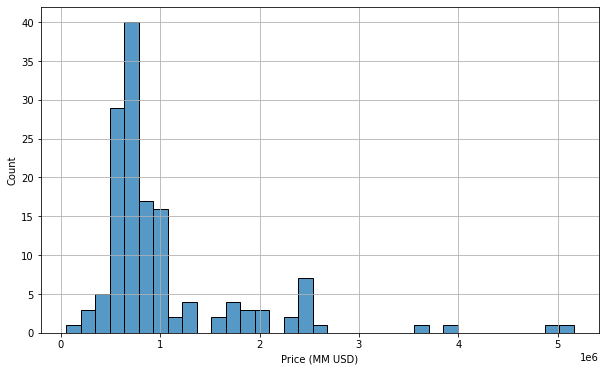

In [38]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
sns.histplot(final_housing_data['Price'])
ax.set_xlabel('Price (MM USD)')
plt.ylabel("Count")
plt.grid()
plt.show()

In [39]:
# final_housing_data.hvplot.hist('Price')

In [40]:
final_housing_data['Price'].describe()

count    1.430000e+02
mean     1.043646e+06
std      8.028568e+05
min      5.500000e+04
25%      6.175000e+05
50%      7.449900e+05
75%      9.994500e+05
max      5.160000e+06
Name: Price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


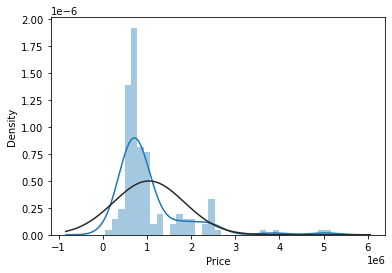

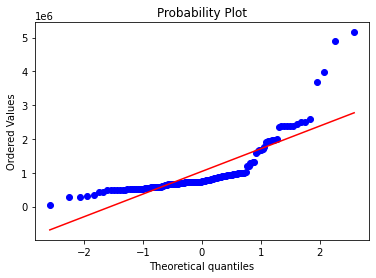

In [41]:
#histogram and normal probability plot
sns.distplot(final_housing_data['Price'], fit=norm)
fig = plt.figure()
res = stats.probplot(final_housing_data['Price'], plot=plt)

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

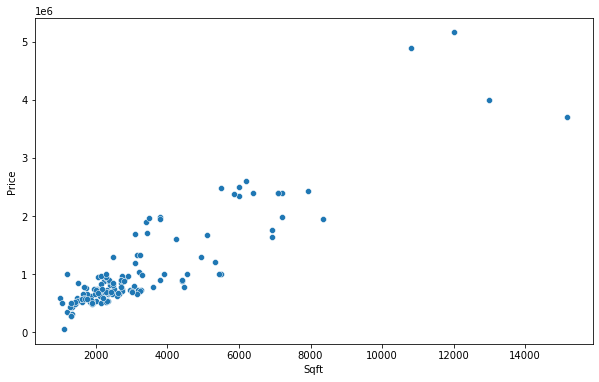

In [42]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
sns.scatterplot(x=final_housing_data['Sqft'], y=final_housing_data['Price'])

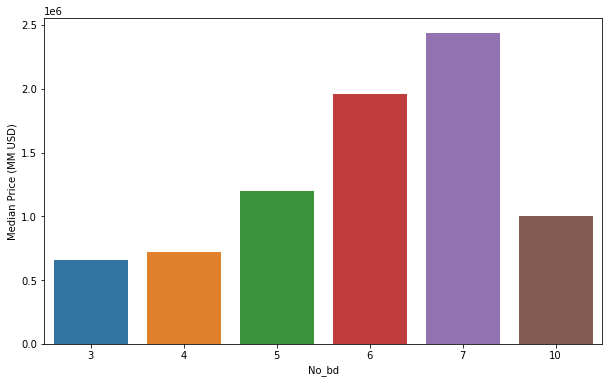

In [43]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
df = final_housing_data.groupby('No_bd').median()
sns.barplot(x=df.index, y=df['Price'])
plt.xlabel('No_bd')
plt.ylabel("Median Price (MM USD)")
# plt.grid()
plt.show()

In [44]:
# df = final_housing_data.groupby('No_bd').median()
# df.hvplot.bar(y='Price', height=400)

In [45]:
#removing outliers
final_housing_data = final_housing_data.drop(final_housing_data[final_housing_data['web-scraper-order']=='1641067270-92'].index)
final_housing_data = final_housing_data.drop(final_housing_data[final_housing_data['No_bd']==10].index)

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

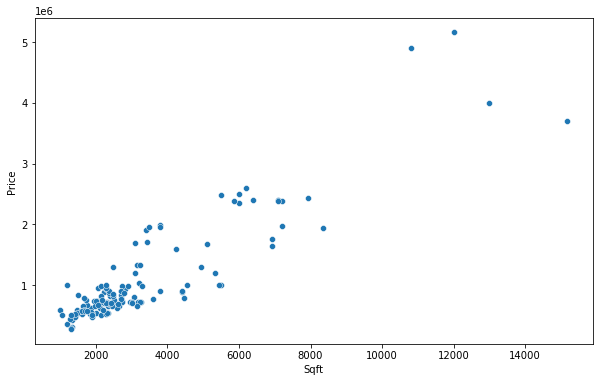

In [46]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
sns.scatterplot(x=final_housing_data['Sqft'], y=final_housing_data['Price'])

In [47]:
# final_housing_data.hvplot.scatter(x='Sqft', y='Price')

In [48]:
final_housing_data['Price'].describe()

count    1.410000e+02
mean     1.050968e+06
std      8.042002e+05
min      2.749000e+05
25%      6.200000e+05
50%      7.449900e+05
75%      9.990000e+05
max      5.160000e+06
Name: Price, dtype: float64

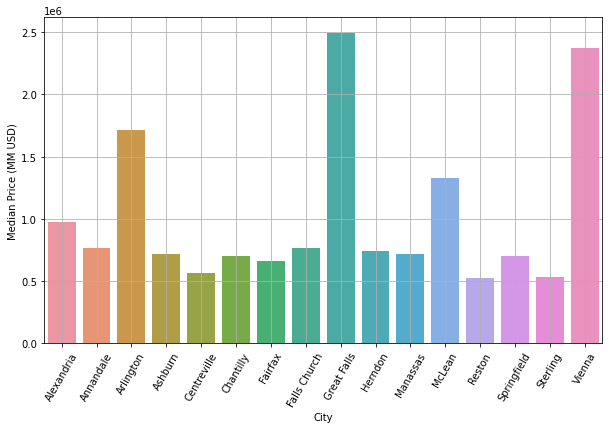

In [49]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
df = final_housing_data.groupby('City').median()
sns.barplot(x=df.index, y=df['Price'])
plt.xlabel('City')
plt.ylabel("Median Price (MM USD)")
plt.xticks(rotation=60)
plt.grid()
plt.show()

In [50]:
# df = final_housing_data.groupby('City').median()
# df.hvplot.bar(y='Price', height=400, rot=60)

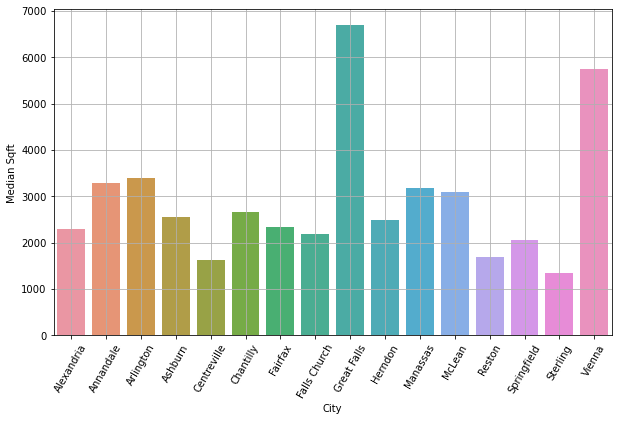

In [51]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
df = final_housing_data.groupby('City').median()
sns.barplot(x=df.index, y=df['Sqft'])
plt.xlabel('City')
plt.ylabel("Median Sqft")
plt.xticks(rotation=60)
plt.grid()
plt.show()

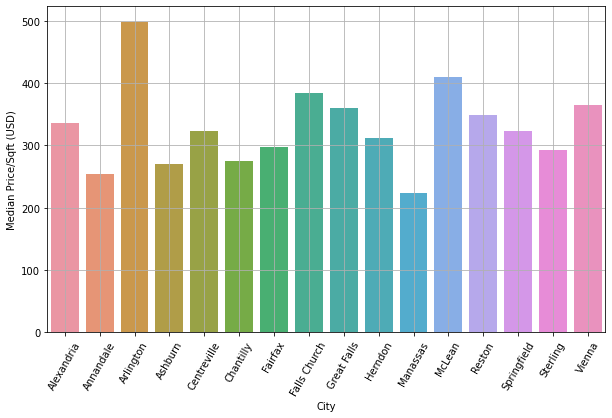

In [52]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
df = final_housing_data.groupby('City').median()
sns.barplot(x=df.index, y=df['Price_sqft'])
plt.xlabel('City')
plt.ylabel("Median Price/Sqft (USD)")
plt.xticks(rotation=60)
plt.grid()
plt.show()
# Most value out of Manassas & Annandale, least value out of Arlington and McLean

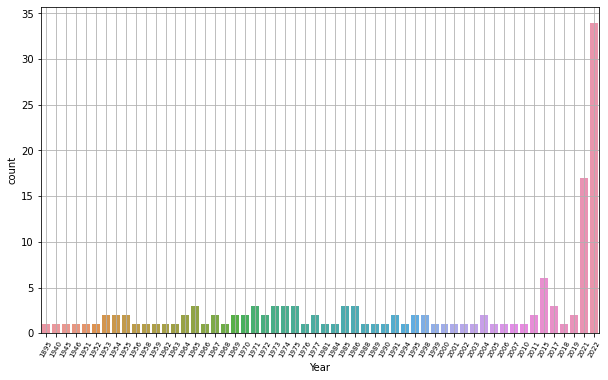

In [53]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
# final_housing_data['Year'] = final_housing_data.Year.astype(int)
sns.countplot(x=final_housing_data['Year'].astype(int))
plt.xticks(size=7, rotation=60)
plt.grid()
plt.show()

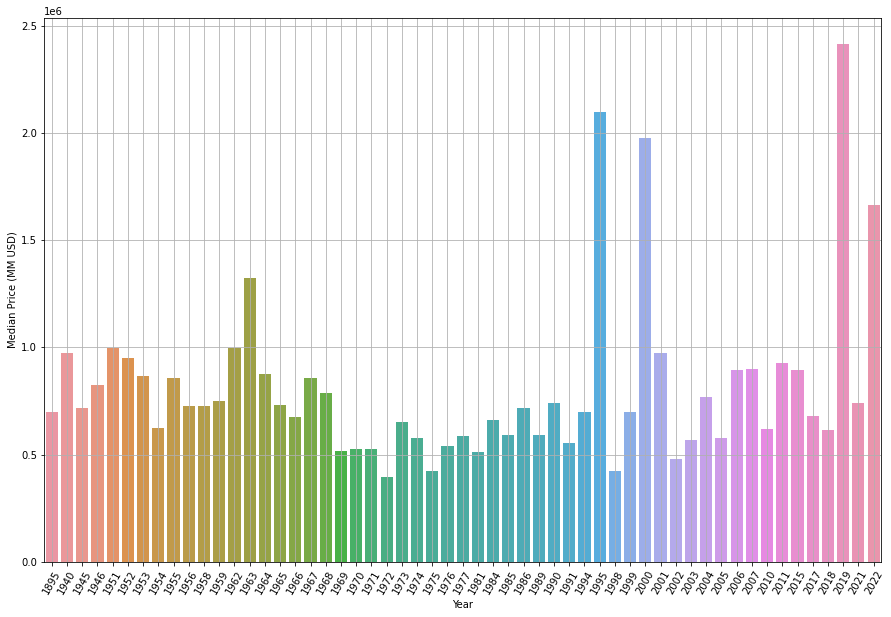

In [54]:
#remove Great Falls outlier
df = final_housing_data.drop(final_housing_data[final_housing_data['Year']==1988].index)

fig, ax = plt.subplots(figsize = ( 15 , 10 ))
df2 = df.groupby('Year').median().reset_index()
df2['Year'] = df2.Year.astype(int)
sns.barplot(x=df2['Year'].astype(str), y=df2['Price'])
plt.xlabel('Year')
plt.ylabel("Median Price (MM USD)")
plt.xticks(size=10, rotation=60)
plt.grid()
plt.show()

In [55]:
# df = final_housing_data.groupby('Year').median()
# df.hvplot.bar(y='Price', height=400, rot=60)

<AxesSubplot:xlabel='Age', ylabel='Price'>

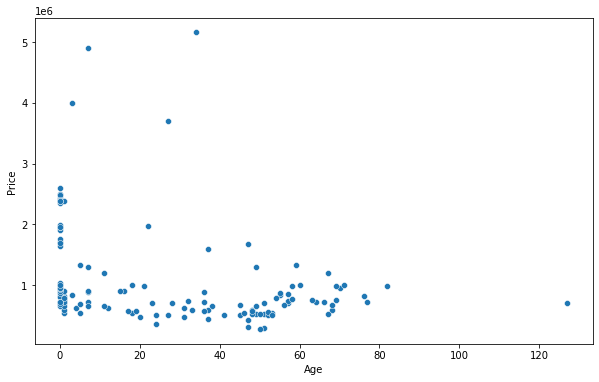

In [56]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
sns.scatterplot(x=final_housing_data['Age'], y=final_housing_data['Price'])

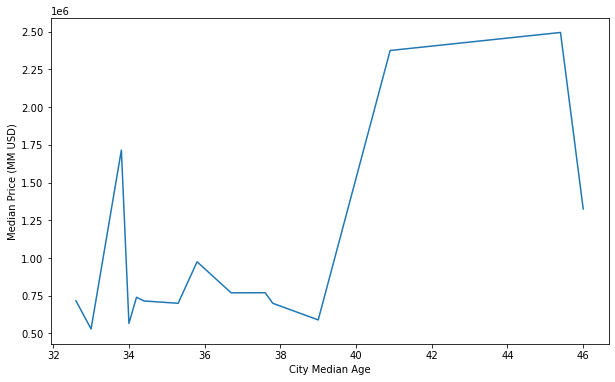

<Figure size 2520x720 with 0 Axes>

In [57]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
df = final_housing_data.groupby('City_med_age').median().reset_index()
plt.plot(df['City_med_age'], df['Price'])
plt.xlabel('City Median Age')
plt.ylabel("Median Price (MM USD)")
plt.xticks(size=10)
plt.figure(figsize=(35,10))
plt.show()

<AxesSubplot:xlabel='Townhouse', ylabel='count'>

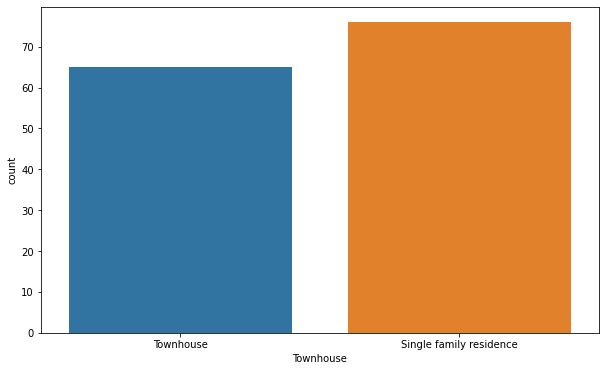

In [58]:
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
sns.countplot(x=final_housing_data['Townhouse'])

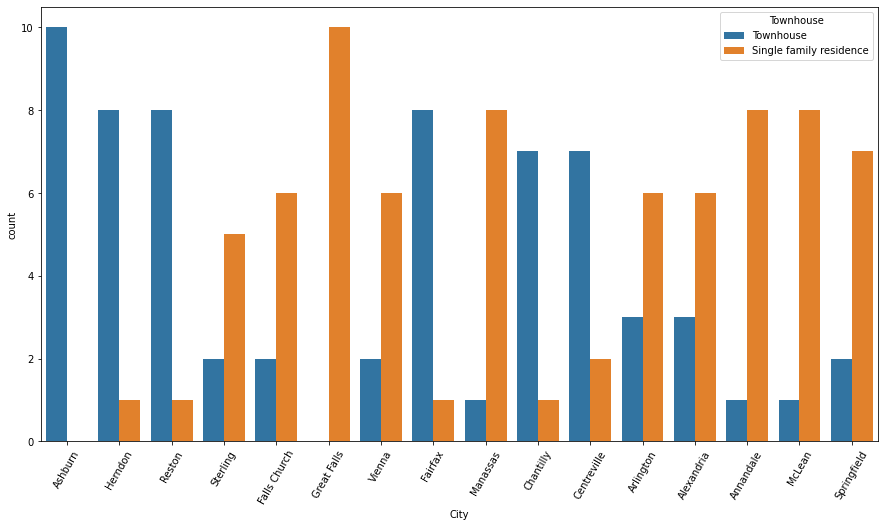

In [59]:
fig, ax = plt.subplots(figsize = ( 15 , 8 ))
# df = final_housing_data.groupby('Townhouse')
sns.countplot(x='City', hue='Townhouse', data=final_housing_data)
# plt.xlabel('City Median Age')
# plt.ylabel("Median Price (MM USD)")
plt.xticks(rotation=60)
plt.show()

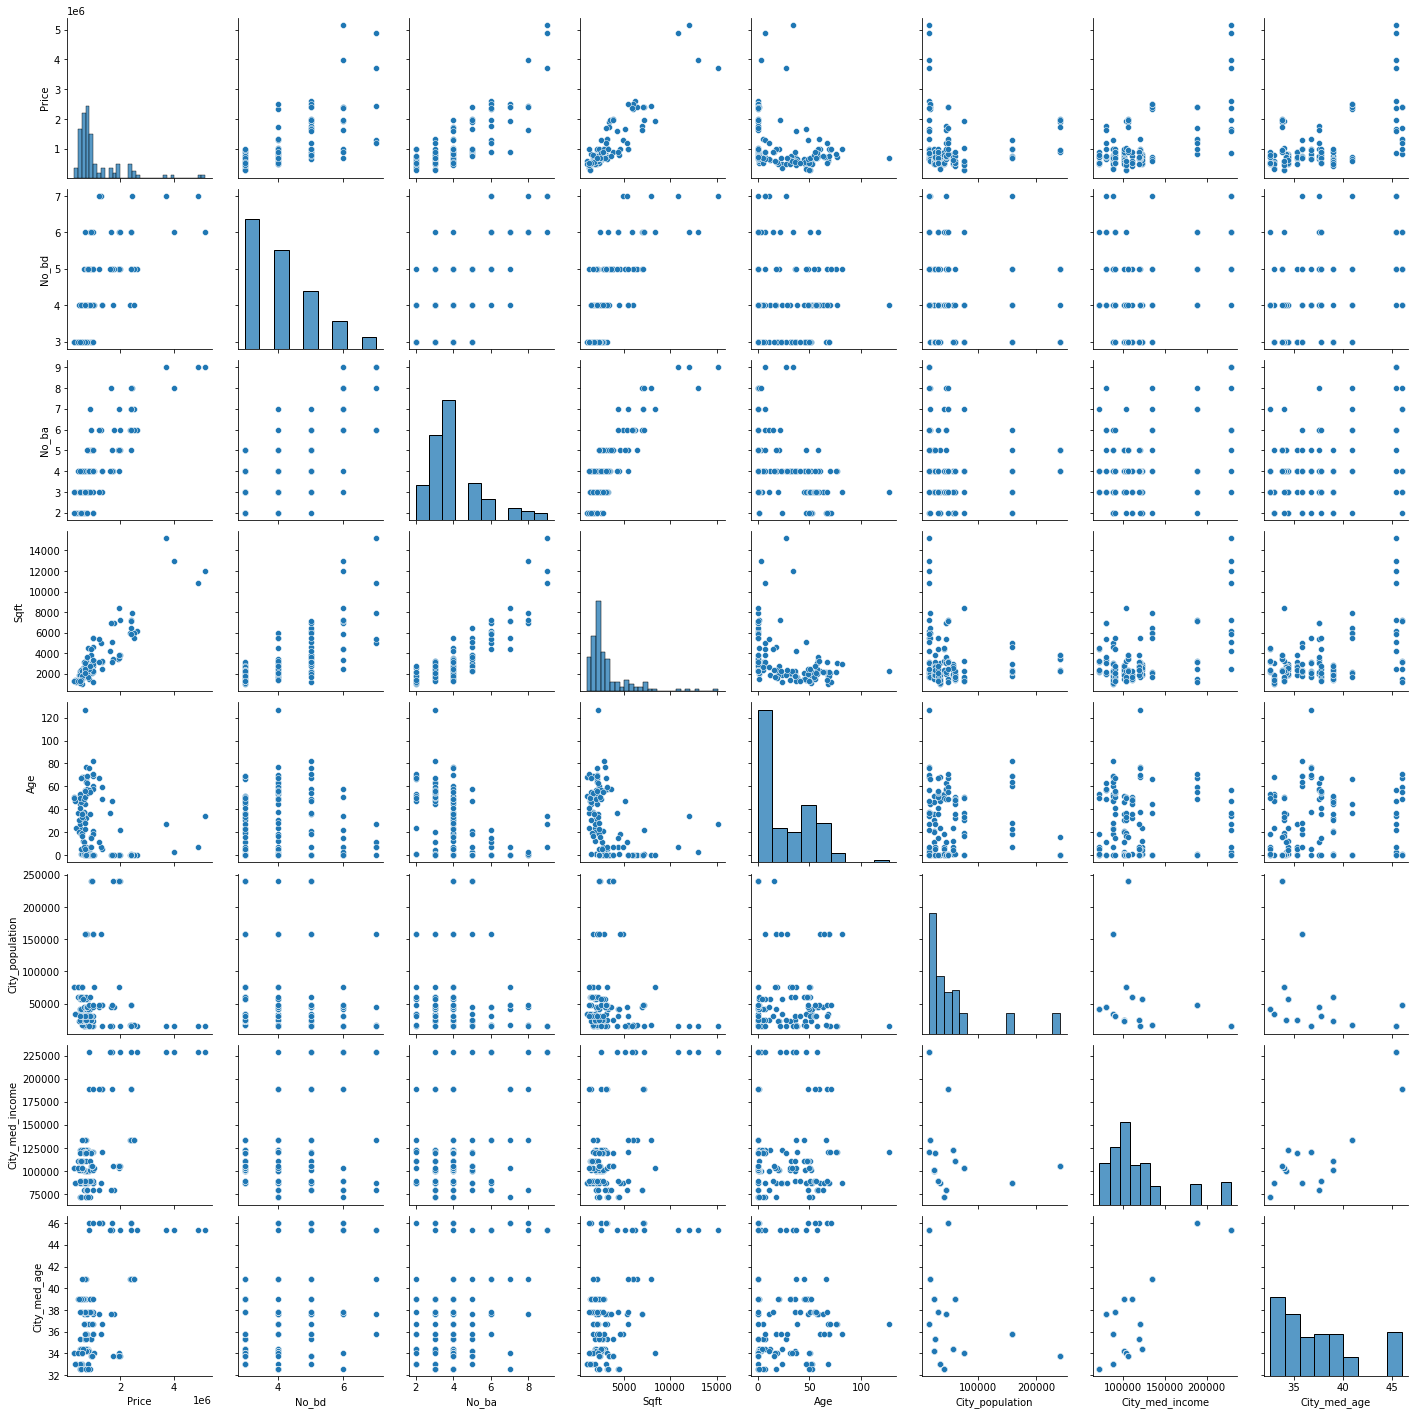

In [60]:
sns.pairplot(final_housing_data, vars=['Price', 'No_bd', 'No_ba', 'Sqft', 'Age', 'City_population', 'City_med_income', 'City_med_age'])

<AxesSubplot:>

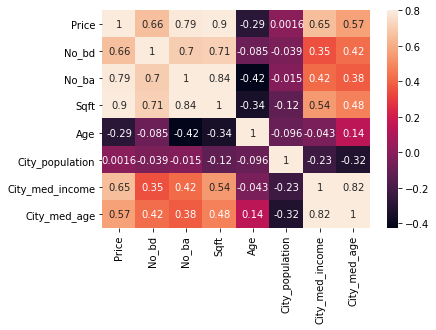

In [61]:
sns.heatmap(final_housing_data[['Price', 'No_bd', 'No_ba', 'Sqft', 'Age', 'City_population', 'City_med_income', 'City_med_age']].corr(), vmax=.8, annot=True)

### Herndon housing data

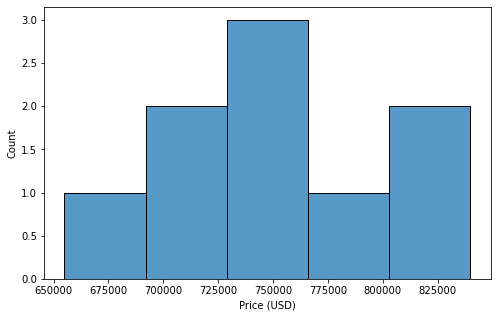

In [62]:
df = final_housing_data[final_housing_data['City']=='Herndon']
fig, ax = plt.subplots(figsize = ( 8 , 5 ))
sns.histplot(df['Price'])
ax.set_xlabel('Price (USD)')
plt.ylabel("Count")
plt.show()

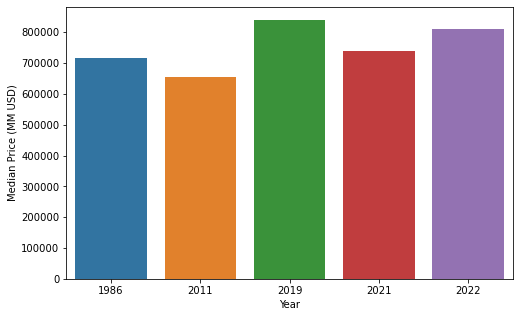

<Figure size 2520x720 with 0 Axes>

In [63]:
df = final_housing_data[final_housing_data['City']=='Herndon']
fig, ax = plt.subplots(figsize = ( 8 , 5 ))
df1 = df.groupby('Year').median().reset_index()
df1['Year'] = df1.Year.astype(int)
sns.barplot(x=df1['Year'].astype(str), y=df1['Price'])
plt.xlabel('Year')
plt.ylabel("Median Price (MM USD)")
# plt.xticks(size=7, rotation=60)
plt.figure(figsize=(35,10))
plt.show()
#fairly new homes in Herndon

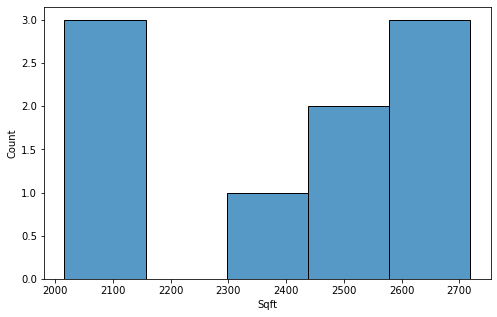

In [64]:
df = final_housing_data[final_housing_data['City']=='Herndon']
fig, ax = plt.subplots(figsize = ( 8 , 5 ))
sns.histplot(df['Sqft'])
ax.set_xlabel('Sqft')
plt.ylabel("Count")
plt.show()

<AxesSubplot:xlabel='Townhouse', ylabel='count'>

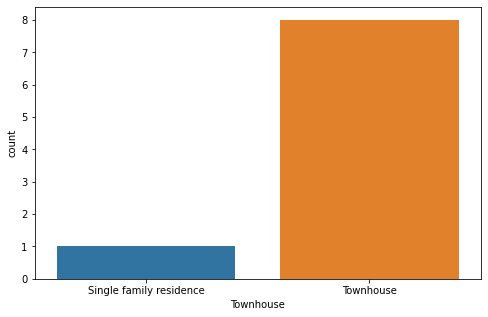

In [65]:
fig, ax = plt.subplots(figsize = ( 8 , 5 ))
df = final_housing_data[final_housing_data['City']=='Herndon']
sns.countplot(x=df['Townhouse'], data=df)

In [66]:
# dealing with categorical data
# final_housing_data = pd.get_dummies(final_housing_data)

## Linear Regression Models

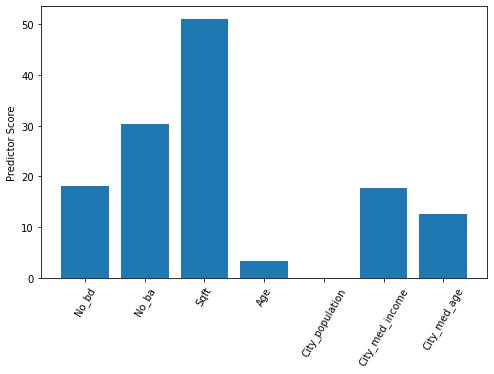

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions
from pandas import read_csv

#feature extraction

predictors = ['No_bd', 'No_ba', 'Sqft', 'Age', 'City_population', 'City_med_income', 'City_med_age']

test = SelectKBest(score_func=f_regression, k='all')
fit = test.fit(final_housing_data[predictors], final_housing_data['Price'])
#summarize scores
fig, ax = plt.subplots(figsize = ( 8 , 5 ))
scores = -np.log10(test.pvalues_)
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation=60)
plt.ylabel('Predictor Score')
plt.show()
#best features to use are Sqft, No_ba, No_bd, City_med_income

In [138]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [69]:
# X = final_housing_data[['Sqft', 'No_ba', 'No_bd', 'City_med_income']]
X = final_housing_data[['Sqft', 'No_ba', 'No_bd', 'City_med_income']]
Y = final_housing_data['Price']

In [70]:
# model = smf.ols("Price ~ No_ba + Sqft + City_med_income + City_med_age", data=final_housing_data).fit(cov_type='HC3')
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit(cov_type='HC3')
results.summary()
# df['pred'] = model.predict()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     37.88
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.86e-21
Time:                        21:55:03   Log-Likelihood:                -1982.0
No. Observations:                 141   AIC:                             3974.
Df Residuals:                     136   BIC:                             3989.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.767e+05   1.53e+05     -3.757      0.000   -8.78e+05   -2.76e+05
Sqft              224.9459     46.621      4.825      0.000     133.570     316.321
No_ba            6.898e+04    3.6e+04      1.914      0.056   -1651.037     1.4e+05
No_bd             1.85e+04   3.79e+04      0.488      0.626   -5.58e+04    9.28e+04
City_med_income     4.7032      0.884      5.317      0.000       2.970       6.437
==============================================================================
Omnibus:                       39.799   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.019
Skew:                           1.095   Prob(JB):                     5.77e-24
Kurtosis:                       6.663   Cond. No.                     6.69e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 6.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# investigating VIF for multicollinearity. All VIF (except for const) <5
# VIF of constant can be ignored because the constant is not a predictor so should not be considered
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]
vif_df

,feature,VIF
0,const,28.436324
1,Sqft,4.400638
2,No_ba,3.662435
3,No_bd,2.198477
4,City_med_income,1.427982


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [73]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10, scoring='r2')
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2 Square: ', r2_square)
    print('_________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [74]:
# standardizing used to rescale features so that they have properties of a standard normal distribution
# standardizing is not always necessary for multiple regression, rescaling is good for interpreting how 
# "important" variables are relative to each other

# pipeline = Pipeline([
#     ('std_scaler', StandardScaler())
# ])

# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.transform(X_test)

In [127]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [76]:
X_Train = sm.add_constant(X_train)
ols_reg = sm.OLS(Y_train, X_Train)
ols_results = ols_reg.fit(cov_type='HC3')
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     29.07
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.12e-15
Time:                        21:55:03   Log-Likelihood:                -1384.5
No. Observations:                  98   AIC:                             2779.
Df Residuals:                      93   BIC:                             2792.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6.096e+05   1.99e+05     -3.057      0.002      -1e+06   -2.19e+05
Sqft              226.0372     56.596      3.994      0.000     115.112     336.963
No_ba            6.661e+04   4.47e+04      1.490      0.136    -2.1e+04    1.54e+05
No_bd            2.955e+04   4.82e+04      0.613      0.540   -6.49e+04    1.24e+05
City_med_income     4.6021      1.126      4.086      0.000       2.394       6.810
==============================================================================
Omnibus:                       26.848   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.257
Skew:                           0.985   Prob(JB):                     3.03e-14
Kurtosis:                       6.371   Cond. No.                     6.79e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 6.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
#this model matches with output from sm.OLS.fit
#Intercept: expected mean value of y when all x=0
intercept2 = lin_reg.intercept_
intercept_df2 = pd.DataFrame(data=[intercept2], columns=['Coefficient'], index=['Intercept'])

#Coefficients: A unit increase of each will result in this much increase in Price
coeff_df2 = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

model_coeff_df2 = pd.concat([intercept_df2, coeff_df2])
model_coeff_df2 = model_coeff_df2.drop(model_coeff_df2[model_coeff_df2['Coefficient']==0].index)
model_coeff_df2

,Coefficient
Intercept,-609612.008712
Sqft,226.037175
No_ba,66614.506811
No_bd,29547.154688
City_med_income,4.602088


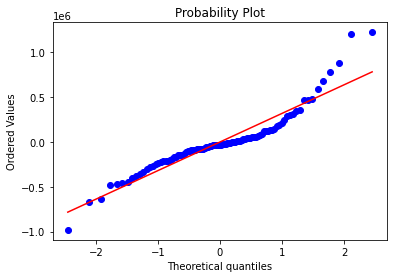

In [78]:
#Assumption of normality of residuals
stats.probplot(ols_results.resid, dist = "norm", plot = plt)
plt.show()

Text(0, 0.5, 'Predicted Values')

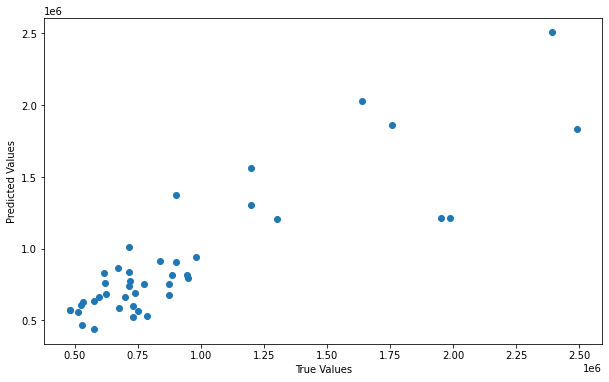

In [132]:
pred = lin_reg.predict(X_test)
# pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y = 'Predicted Values')
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
plt.scatter(Y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [80]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  172021.54514633387
MSE:  62311306463.218315
RMSE:  249622.32765363422
R2 Square:  0.7444790358024711
_________________________________
Train set evaluation:
_____________________
MAE:  217078.62876810614
MSE:  109372032854.17297
RMSE:  330714.4279498144
R2 Square:  0.8646820209398524
_________________________________


In [81]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y_test, test_pred), cross_val(LinearRegression())]],
                         columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172021.545146,6.231131e+10,249622.327654,0.744479,0.110507


In [82]:
# RANSAC regression excludes outliers from the training set so that outliers do not impact 
# the coefficients/parameters learned as part of training

from sklearn.linear_model import RANSACRegressor

robust_reg = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
robust_reg.fit(X_train, Y_train)

test_pred = robust_reg.predict(X_test)
train_pred = robust_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  190259.69717416144
MSE:  98879754426.9693
RMSE:  314451.51363440644
R2 Square:  0.5945222203660868
_________________________________
Train set evaluation:
_____________________
MAE:  239083.57970485746
MSE:  192462887353.41174
RMSE:  438705.92354493204
R2 Square:  0.7618798125891206
_________________________________


Text(0, 0.5, 'Predicted Values')

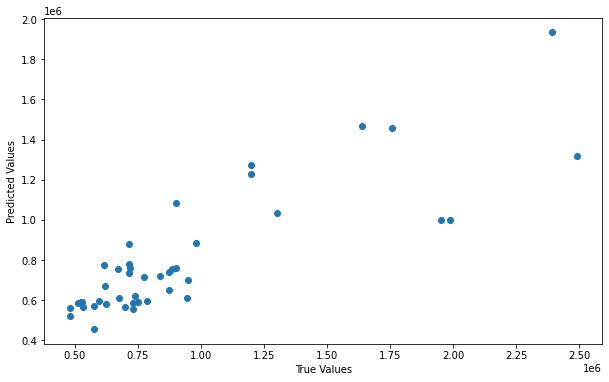

In [83]:
pred = robust_reg.predict(X_test)
# pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
plt.scatter(Y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [84]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(Y_test, test_pred), cross_val(RANSACRegressor())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172021.545146,6.231131e+10,249622.327654,0.744479,0.110507
1,Robust Regression,190259.697174,9.887975e+10,314451.513634,0.594522,0.335220


In [85]:
# ridge regression is suitable for when there's high correlation between IV's and is used to reduce model complexity
# it introduces some bias, called 'ridge regression penalty' (L2) that makes model less susceptible to overfitting
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
ridge_reg.fit(X_train, Y_train)
pred = ridge_reg.predict(X_test)

test_pred = ridge_reg.predict(X_test)
train_pred = ridge_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  169159.5925470887
MSE:  62926525787.81034
RMSE:  250851.6011266628
R2 Square:  0.7419561961456667
_________________________________
Train set evaluation:
_____________________
MAE:  217083.3351255912
MSE:  110705984441.3002
RMSE:  332725.08838574257
R2 Square:  0.8630316206663674
_________________________________


Text(0, 0.5, 'Predicted Values')

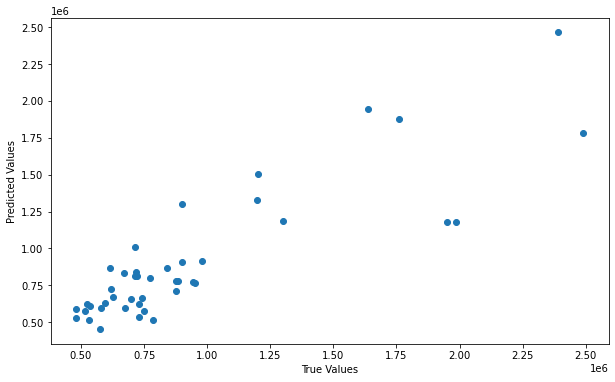

In [86]:
pred = ridge_reg.predict(X_test)
# pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
plt.scatter(Y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [87]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(Y_test, test_pred), cross_val(Ridge())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172021.545146,6.231131e+10,249622.327654,0.744479,0.110507
1,Robust Regression,190259.697174,9.887975e+10,314451.513634,0.594522,0.335220
2,Ridge Regression,169159.592547,6.292653e+10,250851.601127,0.741956,0.111510


In [88]:
# lasso reg reduces model complexity by prohibiting size of the regression coefficient closer to 0
# only uses the required features and sets the rest to 0 (L1 penalty) --> avoids overfitting

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=42)
lasso_reg.fit(X_train, Y_train)

test_pred = lasso_reg.predict(X_test)
train_pred = lasso_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  172043.219258646
MSE:  62314639713.564545
RMSE:  249629.00415128956
R2 Square:  0.7444653670898294
_________________________________
Train set evaluation:
_____________________
MAE:  217098.1505628777
MSE:  109372075485.49751
RMSE:  330714.4924031868
R2 Square:  0.8646819681952473
_________________________________


Text(0, 0.5, 'Predicted Values')

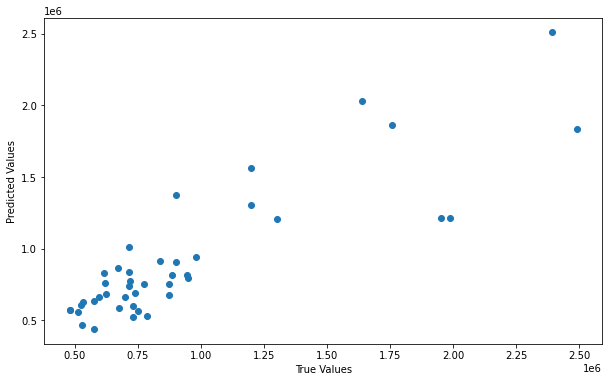

In [89]:
pred = lasso_reg.predict(X_test)
# pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
plt.scatter(Y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [90]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(Y_test, test_pred), cross_val(Lasso())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172021.545146,6.231131e+10,249622.327654,0.744479,0.110507
1,Robust Regression,190259.697174,9.887975e+10,314451.513634,0.594522,0.335220
2,Ridge Regression,169159.592547,6.292653e+10,250851.601127,0.741956,0.111510
3,Lasso Regression,172043.219259,6.231464e+10,249629.004151,0.744465,0.110507


In [91]:
# elastic net address stability of the model by including penalties for large coefficients by combining L1 and L2 penalties
# L1: penalizes a model based on the sum of the absolute coefficient values, coefficients can be minimized to 0, removed
# L2: penalizes a model based on the sum of the squared coefficient values, but coeffs can't be removed

from sklearn.linear_model import ElasticNet

elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
elasticnet_reg.fit(X_train, Y_train)

test_pred = elasticnet_reg.predict(X_test)
train_pred = elasticnet_reg.predict(X_train)

print('Test set evaluation:\n____________________')
print_evaluate(Y_test, test_pred)
print('Train set evaluation:\n_____________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
____________________
MAE:  171933.80610478955
MSE:  62300382368.68136
RMSE:  249600.44544968536
R2 Square:  0.7445238324104626
_________________________________
Train set evaluation:
_____________________
MAE:  216997.56232256937
MSE:  109372673546.4724
RMSE:  330715.396597244
R2 Square:  0.8646812282583515
_________________________________


Text(0, 0.5, 'Predicted Values')

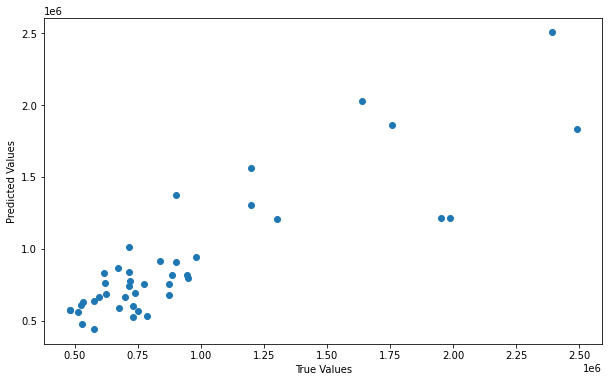

In [121]:
pred = elasticnet_reg.predict(X_test)
# pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
plt.scatter(Y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [93]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(Y_test, test_pred), cross_val(ElasticNet())]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172021.545146,6.231131e+10,249622.327654,0.744479,0.110507
1,Robust Regression,190259.697174,9.887975e+10,314451.513634,0.594522,0.335220
2,Ridge Regression,169159.592547,6.292653e+10,250851.601127,0.741956,0.111510
3,Lasso Regression,172043.219259,6.231464e+10,249629.004151,0.744465,0.110507
4,Elastic Net Regression,171933.806105,6.230038e+10,249600.445450,0.744524,0.124720


In [145]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.fit_transform(X_test)

lin_reg2 = LinearRegression(normalize=True)
lin_reg2.fit(X_train_2_d, Y_train)

# lin_reg2 = make_pipeline(poly_reg, LinearRegression())
# lin_reg2.fit(X_train_2_d, Y_train)

test_pred = lin_reg2.predict(X_test_2_d)
train_pref = lin_reg2.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

Test set evaluation:
_____________________________________
MAE:  157010.1806372169
MSE:  49098429848.27578
RMSE:  221581.65503551005
R2 Square:  0.7986612888172754
_________________________________
Train set evaluation:
_____________________________________
MAE:  216997.56232256937
MSE:  109372673546.4724
RMSE:  330715.396597244
R2 Square:  0.8646812282583515
_________________________________


Text(0, 0.5, 'Predicted Values')

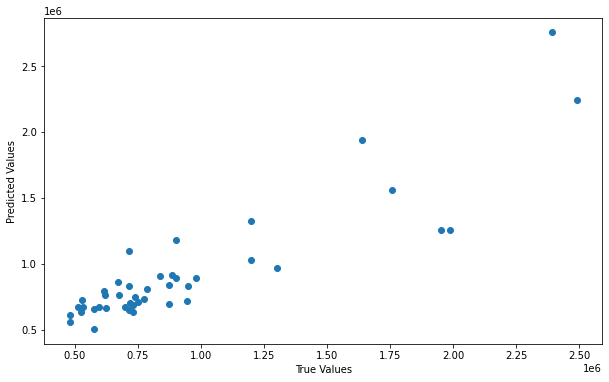

In [178]:
pred = lin_reg2.predict(X_test_2_d)
# pd.DataFrame({'True Values': Y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
plt.scatter(Y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [116]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(Y_test, test_pred), 0]],
                           columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,172021.545146,6.231131e+10,249622.327654,0.744479,0.110507
1,Robust Regression,190259.697174,9.887975e+10,314451.513634,0.594522,0.335220
2,Ridge Regression,169159.592547,6.292653e+10,250851.601127,0.741956,0.111510
3,Lasso Regression,172043.219259,6.231464e+10,249629.004151,0.744465,0.110507
4,Elastic Net Regression,171933.806105,6.230038e+10,249600.445450,0.744524,0.124720
5,Polynomial Regression,157010.180637,4.909843e+10,221581.655036,0.798661,0.000000


Text(0, 0.5, 'RMSE')

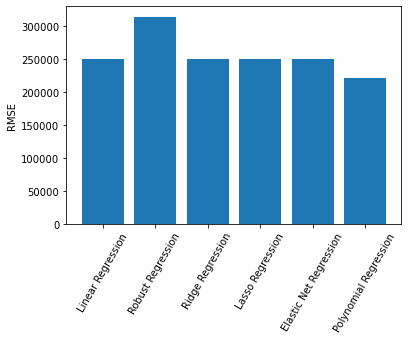

In [117]:
plt.bar(results_df['Model'], results_df['RMSE'])
plt.xticks(rotation=60)
plt.ylabel('RMSE')
#elastic net and linear regression best in terms of RMSE, robust regression is the worst

Text(0, 0.5, 'R2 Square')

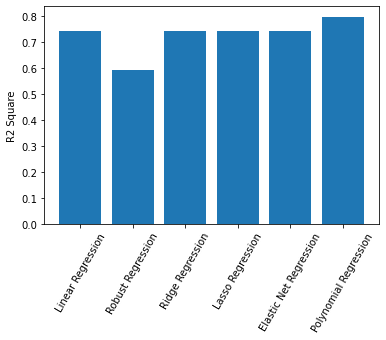

In [118]:
plt.bar(results_df['Model'], results_df['R2 Square'])
plt.xticks(rotation=60)
plt.ylabel('R2 Square')
#linear and lasso regressions perform the same in terms of R2, robust regression is the worst

In [184]:
poly_feature_names = poly_reg.get_feature_names(X_train.columns)
# poly_coefs = lin_reg2.coef_
# poly_coefs = [0.00000000e+00,  9.31322575e-09, -6.87032878e+01,  9.14070568e+04, 2.33094180e+05,  3.64497627e+00, -7.91624188e-09, -6.87032878e+01, 9.14070568e+04,  2.33094180e+05,  3.64497627e+00, -5.74013690e-02, 1.40612269e+02, -1.01538626e+01,  1.53994989e-03, -3.27236547e+04, -6.17981128e+04, -4.77916043e-01, -2.70825216e+04,  1.01457191e+00, -4.26346840e-05]
features = pd.DataFrame(data=[[0.00000000e+00,  9.31322575e-09, -6.87032878e+01,  9.14070568e+04, 2.33094180e+05,  3.64497627e+00, -7.91624188e-09, -6.87032878e+01, 9.14070568e+04,  2.33094180e+05,  3.64497627e+00, -5.74013690e-02, 1.40612269e+02, -1.01538626e+01,  1.53994989e-03, -3.27236547e+04, -6.17981128e+04, -4.77916043e-01, -2.70825216e+04,  1.01457191e+00, -4.26346840e-05]], columns=['1', 'const', 'Sqft', 'No_ba', 'No_bd', 'City_med_income', 'const^2', 'const Sqft', 'const No_ba', 'const No_bd', 'const City_med_income', 'Sqft^2', 'Sqft No_ba', 'Sqft No_bd', 'Sqft City_med_income', 'No_ba^2', 'No_ba No_bd', 'No_ba City_med_income', 'No_bd^2', 'No_bd City_med_income', 'City_med_income^2'])
# features = pd.concat([poly_feature_names, poly_coefs], axis=1)
features

,1,const,Sqft,No_ba,No_bd,City_med_income,const^2,const Sqft,const No_ba,const No_bd,...,Sqft^2,Sqft No_ba,Sqft No_bd,Sqft City_med_income,No_ba^2,No_ba No_bd,No_ba City_med_income,No_bd^2,No_bd City_med_income,City_med_income^2
0,0.0,9.313226e-09,-68.703288,91407.0568,233094.18,3.644976,-7.916242e-09,-68.703288,91407.0568,233094.18,...,-0.057401,140.612269,-10.153863,0.00154,-32723.6547,-61798.1128,-0.477916,-27082.5216,1.014572,-0.000043


In [105]:
#Intercept: expected mean value of y when all x=0
intercept = elasticnet_reg.intercept_
intercept_df = pd.DataFrame(data=[intercept], columns=['Coefficient'], index=['Intercept'])

#Coefficients: A unit increase of each will result in this much increase in Price
coeff_df = pd.DataFrame(elasticnet_reg.coef_, X.columns, columns=['Coefficient'])

model_coeff_df = pd.concat([intercept_df2, coeff_df2])
model_coeff_df = model_coeff_df.drop(model_coeff_df[model_coeff_df['Coefficient']==0].index)
model_coeff_df

,Coefficient
Intercept,-606829.577185
Sqft,226.601902
No_ba,65746.586772
No_bd,29308.430727
City_med_income,4.600980
